In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [6]:
!wget $data 

--2023-09-26 01:53:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  2.80MB/s    in 0.5s    

2023-09-26 01:53:50 (2.80 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [163]:
df = pd.read_csv('housing.csv')

## EDA

In [164]:
len(df)

20640

In [165]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [166]:
%matplotlib_inline

UsageError: Line magic function `%matplotlib_inline` not found.


<Axes: xlabel='median_house_value', ylabel='Count'>

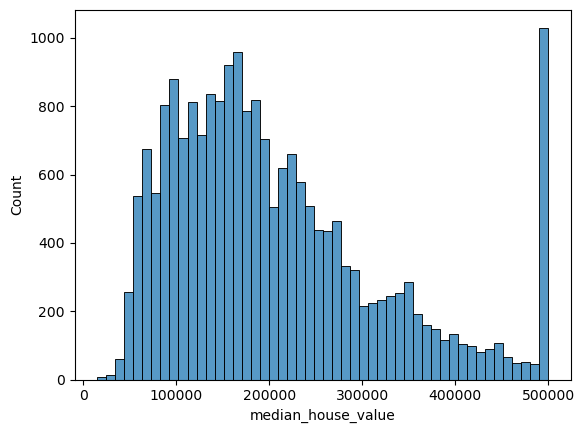

In [167]:
#show that distribution of median house value
#relatively the distribution doesnt have long tail
sns.histplot(df.median_house_value, bins=50)

#### prepraring dataset

In [168]:
#filter dataset to only contain ocean_proximity with value either '<1H OCEAN' or 'INLAND'
df = df[
    (df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')
]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [169]:
#select several feature for this experiment
selected_features = [   'latitude',
                        'longitude',
                        'housing_median_age',
                        'total_rooms',
                        'total_bedrooms',
                        'population',
                        'households',
                        'median_income',
                        'median_house_value']
selected_features

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [170]:
df = df[selected_features]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [171]:
#reset index of dataset
df = df.reset_index(drop=True)
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1
### There's one feature with missing values. What is it?

In [172]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

"total_bedrooms" is the feature that have missing values with total: 157

## Question 2
### What's the median (50% percentile) for variable 'population'?

In [173]:
df["population"].median()

1195.0

## Prepare and split the dataset

In [174]:
#spliting dataset to  train/val/test with 60%/20%/20% respectively
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(3137, 3137, 9413)

In [175]:
#shuffle dataset
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [176]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [177]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [178]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [179]:
df_val.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7493,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
9043,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
5968,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
15148,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0
12391,33.14,-117.11,10.0,3208.0,636.0,1395.0,582.0,3.4455,190500.0


In [180]:
df_test.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9866,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,148700.0
365,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,192400.0
13902,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,241200.0
12089,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,136400.0
12519,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0


In [181]:
#reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [182]:
#applies log transformation for each target "y" to each datasets
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [183]:
#remove target "y" data to not included as trained feature in training process
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?


In [184]:
def train_linear_regression(X, y):
    #add bias column to feature matrix (put at begining of matrix)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    #For get weight we use normal equation: w= (X^TX)^-1 X^T y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [185]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return round(np.sqrt(mse),2)

#### fill with 0

In [186]:
def prepare_X_with_fillna_zero(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [187]:
#get trained weight
X_train = prepare_X_with_fillna_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

#get val data rmse
X_val = prepare_X_with_fillna_zero(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.34

#### fill with mean

In [188]:
def prepare_X_with_fillna_mean(df):
    df_num = df.copy()
    #get mean from train data
    train_mean = df['total_bedrooms'].mean()
    #replace missing value with the mean (all missing value is come from total_bedrooms)
    df_num = df_num.fillna(train_mean)
    X = df_num.values
    return X

In [189]:
#get trained weight
X_train = prepare_X_with_fillna_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

#get val data rmse
X_val = prepare_X_with_fillna_mean(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.34

fill missing value with 0 or mean of the values give same (similar) RMSE: 0.34

## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [190]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    
    #apply regularization with mutiply with diagonal matrix 
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [191]:
#find the best value for "r" parameter 
for r in  [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_with_fillna_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_with_fillna_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print("r:",r,"score:", score)

r: 0 score: 0.34
r: 1e-06 score: 0.34
r: 0.0001 score: 0.34
r: 0.001 score: 0.34
r: 0.01 score: 0.34
r: 0.1 score: 0.34
r: 1 score: 0.34
r: 5 score: 0.35
r: 10 score: 0.35


smallest r gives the best RMSE is 0.000001

## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [207]:
def split_dataset(seed):
    #shuffle dataset
    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)
        
    # proportion train:val:test 60:20:20 
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    #applies log transformation for each target "y" to each datasets
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    #remove target "y" data to not included as trained feature in training process
    del df_train["median_house_value"]
    del df_val["median_house_value"]
    del df_test["median_house_value"]
    
    return df_train, df_val, df_test, y_train, y_val, y_test;

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

def train_model(df_train,y_train):
    X_train = prepare_X_with_fillna_zero(df_train)
    return train_linear_regression(X_train, y_train)

def eval_val_w_rmse(df_val,y_val):
    #get val data rmse
    X_val = prepare_X_with_fillna_zero(df_val)
    y_pred = w0 + X_val.dot(w)

    return rmse(y_val, y_pred)

In [208]:
all_rmse_val = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(seed)
    
    w0, w = train_model(df_train,y_train)
    
    rmse_val = eval_val_w_rmse(df_val,y_val)
    
    all_rmse_val.append(rmse_val) 
    

In [209]:
print("The standard deviation of all scores is:",round(np.std(all_rmse_val),3))

The standard deviation of all scores is: 0.005


The Standard deviation is relatively can be considered very low , so its indicate that our model is quite stable

## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [210]:
seed = 9
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(seed)

In [211]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11994,32.82,-117.05,16.0,4046.0,731.0,1684.0,701.0,4.2312
5634,33.91,-118.00,19.0,5166.0,770.0,2374.0,753.0,5.9790
13629,37.25,-121.96,35.0,1018.0,169.0,484.0,174.0,6.1648
13205,37.30,-121.89,47.0,1604.0,284.0,639.0,278.0,5.8415
6243,33.96,-118.14,34.0,2744.0,541.0,1333.0,503.0,4.0536


In [212]:
df_val.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
15322,37.93,-120.13,5.0,111.0,26.0,58.0,25.0,1.6750
1585,35.33,-119.06,14.0,5264.0,1064.0,3278.0,1049.0,3.8117
10202,33.93,-116.89,29.0,4549.0,916.0,2494.0,912.0,2.0976
2268,34.25,-118.38,38.0,983.0,185.0,513.0,170.0,4.8816
4044,34.01,-118.44,42.0,2061.0,396.0,907.0,393.0,6.0804


In [213]:
#merge train and validation dataset
df_full_train = pd.concat([df_train, df_val])
df_full_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
11994,32.82,-117.05,16.0,4046.0,731.0,1684.0,701.0,4.2312
5634,33.91,-118.00,19.0,5166.0,770.0,2374.0,753.0,5.9790
13629,37.25,-121.96,35.0,1018.0,169.0,484.0,174.0,6.1648
13205,37.30,-121.89,47.0,1604.0,284.0,639.0,278.0,5.8415
6243,33.96,-118.14,34.0,2744.0,541.0,1333.0,503.0,4.0536


In [214]:
#training model
r=0.001
X_train = prepare_X_with_fillna_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train,r)

In [215]:
#test the model using test dataset
X_test = prepare_X_with_fillna_zero(df_test)
y_pred = w0 + X_test.dot(w)

print("The RMSE of dataset is: ", rmse(y_test, y_pred))

The RMSE of dataset is:  0.3348865394354453
